# Module 9. Scalable Data Processing

## Advanced Task 1. Dealing with unclean data

### Pablo Yañez Martin

In [1]:
from pyspark import SparkConf, SparkContext
import matplotlib.pyplot as plt

In [2]:
ruta = "D:/Dropbox/Pablo/Master/Modulo 9. Scalable Data Processing/Java/Data/bridge.csv"

In [3]:
spark_conf = SparkConf().setAppName("Cleaning the dataset Bridge").setMaster("local[2]")
spark_context = SparkContext(conf=spark_conf)

In [4]:
logger = spark_context._jvm.org.apache.log4j
logger.LogManager.getLogger("org").setLevel(logger.Level.WARN)

Reading the csv file 

In [5]:
lectura = spark_context.textFile(ruta)

Splitting rows of the csv

In [6]:
columnas=lectura.map(lambda line: line.split(','))

All the values are Strings, we have to convert the typeof the data from string to float, in the case that are numbers, in the other case we have to reject those values, that are missing values (nulls) or values that are character ('xxxx') instead of numbers.
In order to filter the invalid values, I have tried differents options, such as, the function isdigit() or isnumeric(), but those methods only works when are integers, not float. That is why I define the following function which convert a decimal number with the string type to a float.

In [7]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

In [8]:
filtro=columnas.filter(lambda array : isfloat(array[0]) and isfloat(array[1]))

Mapping those values in a tuple

In [9]:
mapeo = filtro.map(lambda array : (float(array[0]),float(array[1])))

We will keep with the different tuples

In [10]:
distintos = mapeo.distinct().collect()

Plotting the data cleaned

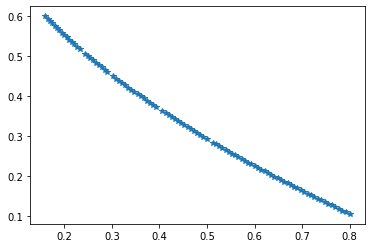

In [11]:
x=[]
y=[]
    
for (a,b) in distintos:
    x.append(float(a))
    y.append(float(b))

plt.plot(x,y,'*')
plt.show()

In [12]:
spark_context.stop()